# Real estate investments for holiday rentals

MINE-4101: Applied Data Science  
Univerisdad de los Andes

David Esteban Fajardo Torres   

Dataset: San Francisco, California, United States

In [2]:
import pandas as pd

In [3]:
air_bnb_df = pd.read_csv('./data/listings.csv')

In [4]:
air_bnb_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [5]:
air_bnb_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50489368,https://www.airbnb.com/rooms/50489368,20240904163718,2024-09-04,previous scrape,(B) Furnished Efficiency Studio near Union Square,"This special place is close to everything, mak...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,190158687,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.03
1,53687935,https://www.airbnb.com/rooms/53687935,20240904163718,2024-09-04,previous scrape,2 Private Rooms in SF. Walk to Bart. Modern Home,Enjoy a stylish and zen experience at this mod...,safe and quiet neighborhood,https://a0.muscache.com/pictures/347792c2-b0e2...,433577666,...,4.76,4.57,4.48,0005556,f,1,0,1,0,0.63
2,623833252305593889,https://www.airbnb.com/rooms/623833252305593889,20240904163718,2024-09-04,city scrape,Massive 1-bedroom condo in the heart of SF,Spacious 1-bed 1-bath condo in downtown SF nea...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,2180153,...,5.00,4.93,4.73,2022-002139STR,f,2,1,1,0,0.57
3,53817024,https://www.airbnb.com/rooms/53817024,20240904163718,2024-09-04,previous scrape,Large 1-bedroom in a condo in the heart of SF,Spacious private bedroom in a 1-bed 1-bath con...,Situated in Rincon Hill / East Cut neighborhoo...,https://a0.muscache.com/pictures/miso/Hosting-...,2180153,...,5.00,5.00,4.87,2022-002139STR,f,2,1,1,0,1.24
4,54381390,https://www.airbnb.com/rooms/54381390,20240904163718,2024-09-04,previous scrape,Cozy 1-bedroom condo with roof deck,1 bedroom condo in a new building located in t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2274937,...,5.00,5.00,4.89,STR-0005716,t,1,1,0,0,0.34


The most relevant attributes for analysis:

- Price
- Location
- Property type
- User rating


In [6]:
air_bnb_df['neighbourhood_cleansed'].isnull().sum()

np.int64(0)

In [7]:
air_bnb_df.groupby('property_type').size()

property_type
Casa particular                          2
Cycladic home                            1
Entire bungalow                          5
Entire condo                           868
Entire cottage                          14
Entire guest suite                     509
Entire guesthouse                       70
Entire home                            977
Entire in-law                            1
Entire loft                             59
Entire place                             5
Entire rental unit                    2153
Entire resort                            3
Entire serviced apartment              157
Entire townhouse                        62
Entire vacation home                    14
Entire villa                             7
Private room                            10
Private room in bed and breakfast       22
Private room in bungalow                 1
Private room in casa particular          4
Private room in condo                  179
Private room in cottage                 

In [8]:
air_bnb_df.groupby('property_type')['reviews_per_month'].count()

property_type
Casa particular                          2
Cycladic home                            1
Entire bungalow                          5
Entire condo                           691
Entire cottage                          13
Entire guest suite                     501
Entire guesthouse                       62
Entire home                            852
Entire in-law                            1
Entire loft                             51
Entire place                             4
Entire rental unit                    1563
Entire resort                            3
Entire serviced apartment              129
Entire townhouse                        54
Entire vacation home                    10
Entire villa                             6
Private room                             7
Private room in bed and breakfast       15
Private room in bungalow                 1
Private room in casa particular          4
Private room in condo                  157
Private room in cottage                 

In [9]:
air_bnb_df.groupby('property_type')['reviews_per_month'].apply(lambda x: x.isnull().sum())

property_type
Casa particular                         0
Cycladic home                           0
Entire bungalow                         0
Entire condo                          177
Entire cottage                          1
Entire guest suite                      8
Entire guesthouse                       8
Entire home                           125
Entire in-law                           0
Entire loft                             8
Entire place                            1
Entire rental unit                    590
Entire resort                           0
Entire serviced apartment              28
Entire townhouse                        8
Entire vacation home                    4
Entire villa                            1
Private room                            3
Private room in bed and breakfast       7
Private room in bungalow                0
Private room in casa particular         0
Private room in condo                  22
Private room in cottage                 1
Private room in gues

In [10]:
air_bnb_df.groupby('room_type').size()

room_type
Entire home/apt    4924
Hotel room           97
Private room       2718
Shared room          68
dtype: int64

In [12]:
air_bnb_df['price'].isnull().sum()

np.int64(1649)

In [14]:
air_bnb_df.groupby('property_type')['price'].count()

property_type
Casa particular                          2
Cycladic home                            0
Entire bungalow                          4
Entire condo                           678
Entire cottage                          12
Entire guest suite                     474
Entire guesthouse                       64
Entire home                            760
Entire in-law                            1
Entire loft                             49
Entire place                             5
Entire rental unit                    1796
Entire resort                            3
Entire serviced apartment               89
Entire townhouse                        49
Entire vacation home                     8
Entire villa                             6
Private room                             9
Private room in bed and breakfast       21
Private room in bungalow                 1
Private room in casa particular          2
Private room in condo                  140
Private room in cottage                 

In [21]:
duplicates = air_bnb_df.duplicated().sum()
print('Number of duplicate records', duplicates)

Number of duplicate records 0


<Axes: title={'center': 'Number of properties per neighbourhood'}, xlabel='Neighbourhood', ylabel='Count'>

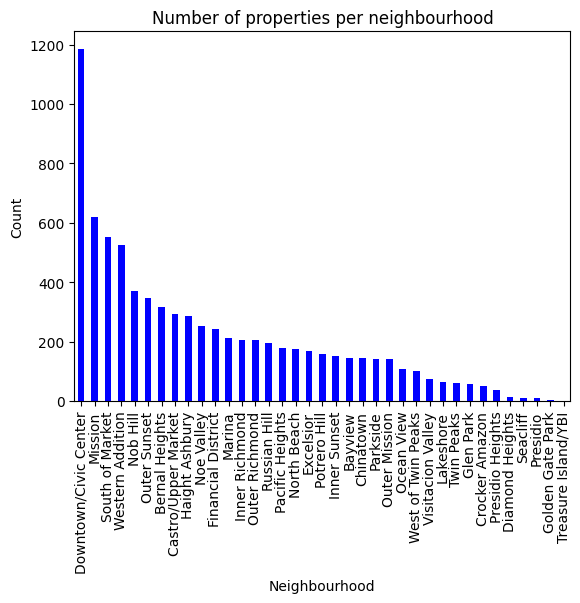

In [28]:
air_bnb_df['neighbourhood_cleansed'].value_counts().plot(kind='bar', color='blue', title='Number of properties per neighbourhood', xlabel='Neighbourhood', ylabel='Count')

In [42]:
air_bnb_df["price_float"] = air_bnb_df["price"].replace({r'\$': '', r',': ''}, regex=True).astype(float).dropna()
max_price = air_bnb_df["price_float"].max()
min_price = air_bnb_df["price_float"].min()
print('Max price:', max_price, 'Min price:', min_price)


Max price: 50000.0 Min price: 25.0


In [44]:
price_variance = air_bnb_df['price_float'].var(skipna=True)
print('Variance:', price_variance)

Variance: 1000157.4203688395


In [48]:
price_standard_deviation = air_bnb_df['price_float'].std()
print('Standard deviation:', price_standard_deviation)

Standard deviation: 1000.0787070870169


In [47]:
price_media = air_bnb_df['price_float'].mean()
print('Media:', price_media)  
Variance: 1000157.4203688395
Media: 239.66531341344592
Median: 150.0
Standard deviation: 1000.0787070870169


Media: 239.66531341344592


In [46]:
price_median = air_bnb_df['price_float'].median()
print('Median:', price_median)  

Median: 150.0


<Axes: title={'center': 'Number of property types'}, xlabel='Property types', ylabel='Count'>

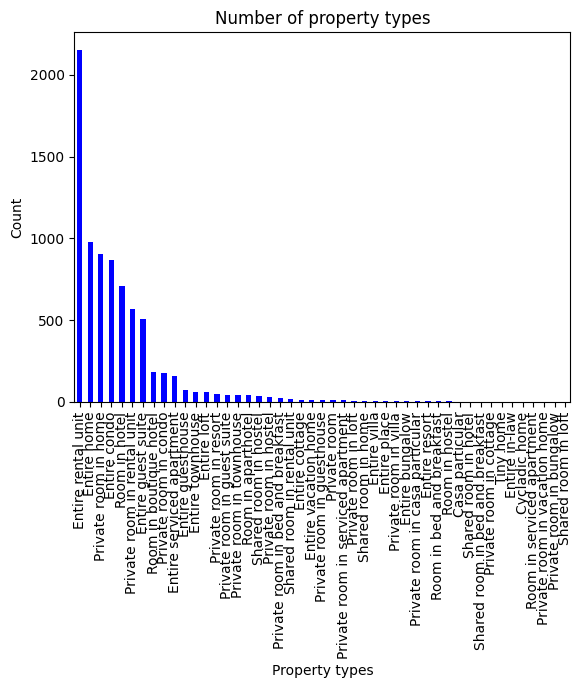

In [30]:
air_bnb_df['property_type'].value_counts(dropna=False, normalize=False).plot(kind='bar', color='blue', title='Number of property types', xlabel='Property types', ylabel='Count')